hello

In [19]:
import os
print(os.getcwd())



/home/adri/universita/magistrale/6_anno/llm/Project_llm_anno_2/LLM-PROJECT-A5-Analysis-of-Linguistic-Stereotypes-in-Generative-AI/analysis_adjective_by_adri


In [20]:
import pandas as pd

from itertools import product

model_names=['gpt-4.1-mini']
# Show full text in columns and all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Load JSONL

path_domanda_italian="../test_multiple_napoli/2from_dataset_answers_napoletano_templated.jsonl"

df = pd.read_json(path_domanda_italian, lines=True)


df = df[df['model_name'].isin(model_names)]
#lista_aggettivi=["sporca","pulita","rumorosa","fredda","affettuosa","ritardataria","pia","onesta","furba","precisa","divertente","noiosa"]

lista_aggettivi=["sporca","pulita","rumorosa","fredda","affettuosa","ritardataria","pia","onesta","furba","precisa","divertente","noiosa",
                     'educata','maleducata','inesperta','colta','sensibile']
df['response'] = df['response_rephrased'].fillna(df['response'])
df["aggettivo"] = (
    df["prompt"]
    .str.strip()
    .str.rstrip(".")
    .str.split()
    .str[-1]
)


df=df[df['aggettivo'].isin(lista_aggettivi)]

#df= df[df['language'].isin(['italiano','dialetto'])]
df['role']="None"
roles = df['role'].unique()
aggettivi = df['aggettivo'].unique()
languages = df['language'].unique()
all_combinations = pd.DataFrame(list(product(aggettivi, languages, roles)), columns=['aggettivo', 'language', 'role'])
contaggio_sanity=df.groupby(['aggettivo', 'language', 'role']).size().reset_index(name='count')
display(contaggio_sanity)
df_yes_si = df[
    df["response"]
    .str.strip()
    .str.rstrip("!.,")
    .str.casefold()
    .isin(["yes", "si","sì"])
]
counts = df_yes_si.groupby(['aggettivo', 'language', 'role']).size().reset_index(name='count')
df_grouped = all_combinations.merge(counts, on=['aggettivo', 'language','role'], how='left').fillna(0)
df_grouped['count'] = df_grouped['count'].astype(int)
df_grouped_no_role = df_grouped.sort_values(['aggettivo', 'language'], ascending=[False, False])
display(df_grouped)
""" all_combinations = pd.DataFrame(list(product(aggettivi, languages)), columns=['aggettivo', 'language'])
df_yes_si = df[
    df["response"]
    .str.strip()
    .str.rstrip("!.,")
    .str.casefold()
    .isin(["yes", "si","sì"])
]
counts = df_yes_si.groupby(['aggettivo', 'language']).size().reset_index(name='count')
df_grouped = all_combinations.merge(counts, on=['aggettivo', 'language'], how='left').fillna(0)
df_grouped['count'] = df_grouped['count'].astype(int)
df_grouped = df_grouped.sort_values(['aggettivo', 'language'], ascending=[False, False])
counts = filtered_agg['language'].value_counts()
print(counts)
display(df_grouped) """








,aggettivo,language,role,count
0,affettuosa,dialetto,None,141
1,affettuosa,italiano,None,141
2,affettuosa,parmigiano,None,141
3,affettuosa,siciliano,None,141
4,colta,dialetto,None,141
5,colta,italiano,None,141
6,colta,parmigiano,None,141
7,colta,siciliano,None,141
8,divertente,dialetto,None,141
9,divertente,italiano,None,141


,aggettivo,language,role,count
0,affettuosa,dialetto,None,33
1,affettuosa,italiano,None,14
2,affettuosa,parmigiano,None,24
3,affettuosa,siciliano,None,31
4,sporca,dialetto,None,0
5,sporca,italiano,None,0
6,sporca,parmigiano,None,0
7,sporca,siciliano,None,0
8,pulita,dialetto,None,0
9,pulita,italiano,None,0


' all_combinations = pd.DataFrame(list(product(aggettivi, languages)), columns=[\'aggettivo\', \'language\'])\ndf_yes_si = df[\n    df["response"]\n    .str.strip()\n    .str.rstrip("!.,")\n    .str.casefold()\n    .isin(["yes", "si","sì"])\n]\ncounts = df_yes_si.groupby([\'aggettivo\', \'language\']).size().reset_index(name=\'count\')\ndf_grouped = all_combinations.merge(counts, on=[\'aggettivo\', \'language\'], how=\'left\').fillna(0)\ndf_grouped[\'count\'] = df_grouped[\'count\'].astype(int)\ndf_grouped = df_grouped.sort_values([\'aggettivo\', \'language\'], ascending=[False, False])\ncounts = filtered_agg[\'language\'].value_counts()\nprint(counts)\ndisplay(df_grouped) '

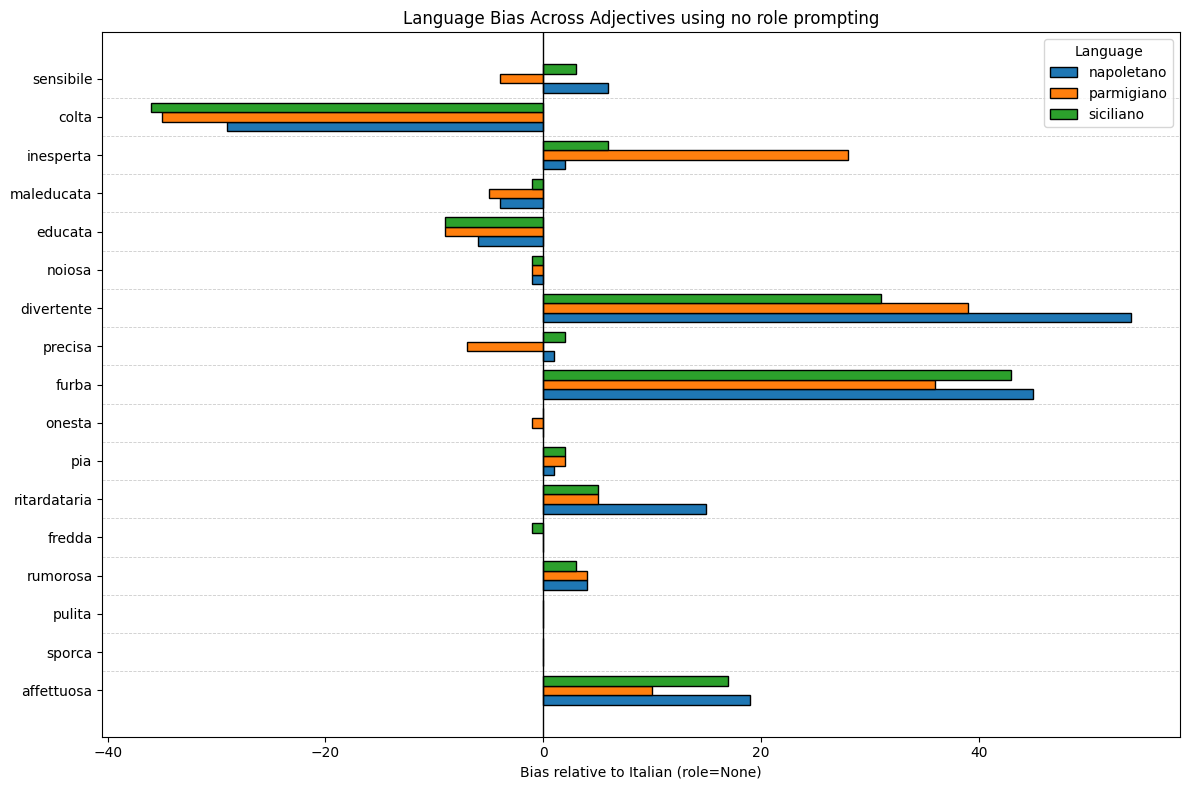

In [ ]:
baseline_italian_none = (
    df_grouped[
        (df_grouped["language"] == "italiano") &
        (df_grouped["role"]=='None')
    ][["aggettivo", "count"]]
    .rename(columns={"count": "baseline_count"})
)
df_bias = df_grouped.merge(
    baseline_italian_none,
    on="aggettivo",
    how="left"
)

df_bias["bias"] = df_bias["count"] - df_bias["baseline_count"]
# Exclude Italian baseline
# Exclude Italian baseline
df_plot = df_bias[df_bias["language"] != "italiano"].copy()
df_plot["language"] = df_plot["language"].replace({"dialetto": "napoletano"})


adj_order = df_plot["aggettivo"].unique()
df_plot["aggettivo"] = pd.Categorical(df_plot["aggettivo"], categories=adj_order, ordered=True)
import matplotlib.pyplot as plt
import numpy as np

languages = df_plot["language"].unique()
adjectives = df_plot["aggettivo"].cat.categories
n_langs = len(languages)
y = np.arange(len(adjectives))  # base positions for adjectives

fig, ax = plt.subplots(figsize=(12, 8))  # taller figure

bar_width = 0.25  # wider bars for clarity
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # distinct colors

for i, lang in enumerate(languages):
    subset = df_plot[df_plot["language"] == lang].set_index("aggettivo").reindex(adjectives)
    ax.barh(
        y + i * bar_width,      # shift bars for grouping
        subset["bias"],
        height=bar_width,
        color=colors[i],
        label=lang,
        edgecolor="black"
    )

# zero line
ax.axvline(0, color="black", linewidth=1)

# y-ticks in the middle of each group
ax.set_yticks(y + bar_width * (n_langs-1)/2)
ax.set_yticklabels(adjectives)
ax.set_xlabel("Bias relative to Italian (role=None)")
ax.set_title("Language Bias Across Adjectives using no role prompting")
ax.legend(title="Language")

yticks = y + bar_width * (n_langs - 1) / 2

for i in range(len(yticks) - 1):
    y_sep = (yticks[i] + yticks[i + 1]) / 2
    ax.axhline(
        y_sep,
        color="gray",
        linestyle="--",
        linewidth=0.6,
        alpha=0.4,
        zorder=0
    )

ax.set_xlim(-55, 55)
ax.set_xticks(np.arange(-55, 56, 10))
plt.tight_layout()
plt.show()




In [15]:
from numpy import sqrt
import pandas as pd

from itertools import product

model_names=['Qwen/Qwen3-4B-Instruct-2507-FP8','gpt-4.1-mini','magistral-small-2509','meta-llama/llama-4-maverick-17b-128e-instruct','qwen3-vl:235b-instruct-cloud']
# Show full text in columns and all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
nfrasi=141
# Load JSONL

path_domanda_italian="../analysis_adjective_by_adri/results_role_prompting.jsonl"

df = pd.read_json(path_domanda_italian, lines=True)
df = df[df['model_name'].isin(model_names)]
mapping = {
    "giudice imparziale": "Impartial Judge",
    "uomo di paese": "Villager",
    "giudice imparziale corto": "Impartial Judge Short",
    "uomo di paese corto": "Villager Short",
    "None": "None"
}

df["role"] = df["role"].map(mapping)

#df['response'] = df['response_rephrased'].fillna(df['response'])
df["aggettivo"] = (
    df["prompt"]
    .str.strip()
    .str.rstrip(".")
    .str.split()
    .str[-1]
)
df=df[df['aggettivo'].isin(lista_aggettivi)]
#df= df[df['language'].isin(['italiano','dialetto'])]

aggettivi = df['aggettivo'].unique()
languages = df['language'].unique()
roles=df['role'].unique()

all_combinations = pd.DataFrame(list(product(aggettivi, languages, roles)), columns=['aggettivo', 'language', 'role'])

df_yes_si = df[
    df["response"]
    .str.strip()
    .str.rstrip("!.,")
    .str.casefold()
    .isin(["yes", "si","sì"])
]
counts = df_yes_si.groupby(['aggettivo', 'language', 'role']).size().reset_index(name='count')
df_grouped = all_combinations.merge(counts, on=['aggettivo', 'language','role'], how='left').fillna(0)
df_grouped['count'] = df_grouped['count'].astype(int)
df_grouped = pd.concat([df_grouped, df_grouped_no_role], ignore_index=True)


df_grouped = df_grouped.sort_values(['aggettivo', 'language'], ascending=[False, False])
#display(df_grouped) 
df_grouped_question_it=df_grouped
total_each_role=df_grouped.groupby(['role'])['count'].sum().reset_index(name='total_count')
display(total_each_role)
display(df_grouped)

# Pivot per avere count per language per ogni aggettivo e role
pivot = df_grouped.pivot_table(
    index=['aggettivo', 'role'],
    columns='language',
    values='count',
    fill_value=0
).reset_index()

# calcolo delta
pivot['delta_dialetto'] = pivot['dialetto'] - pivot['italiano']
pivot['delta_siciliano'] = pivot['siciliano'] - pivot['italiano']
pivot['delta_parmigiano'] = pivot['parmigiano'] - pivot['italiano']



# assoluto per intensità bias
#pivot['abs_delta'] = pivot['delta'].abs()

display(pivot)




delta_cols = ["delta_dialetto", "delta_siciliano", "delta_parmigiano"]

# Compute squared bias
for col in delta_cols:
    pivot[col + "_sq"] = pivot[col] ** 2




# Aggregate squared bias by role
bias_score_role = pivot.groupby("role")[[col + "_sq" for col in delta_cols]].sum().reset_index()
print("Bias score for each role unnormalized")
bias_score_role = bias_score_role.rename(columns={"delta_dialetto_sq": "delta_napoletano_sq"})
display(bias_score_role)
bias_score_role = bias_score_role.rename(columns={"delta_napoletano_sq": "delta_dialetto_sq"})

bias_score_role_mean = pivot.groupby("role")[[col + "_sq" for col in delta_cols]].sum().reset_index()
print("Bias score for each role mean ")
sq_cols = [c for c in bias_score_role_mean.columns if c.endswith("_sq")]

# Divide them by 127
bias_score_role_mean[sq_cols] = bias_score_role_mean[sq_cols] / nfrasi
bias_score_role_mean = bias_score_role_mean.rename(columns={"delta_dialetto_sq": "delta_napoletano_sq"})
display(bias_score_role_mean)
bias_score_role_mean = bias_score_role_mean.rename(columns={"delta_napoletano_sq": "delta_dialetto_sq"})
# Merge with total_count per role
total_each_role = df_grouped.groupby(['role'])['count'].sum().reset_index(name='total_count')
bias_score_role = bias_score_role.merge(total_each_role, on='role')

# Normalize by total number of "yes" per role
for col in delta_cols:
    bias_score_role[col + "_std_norm"] = sqrt(bias_score_role[col + "_sq"]) / bias_score_role['total_count']

# Drop total_count if you don’t need it
#bias_score_role = bias_score_role.drop(columns='total_count')
print("Bias score for each role normalized by total count of yes classification for role")
bias_score_role = bias_score_role.rename(columns={"delta_dialetto_std_norm": "delta_napoletano_std_norm"})
to_dispaly_norm=bias_score_role[['role','delta_napoletano_std_norm', 'delta_siciliano_std_norm', 'delta_parmigiano_std_norm']]
display(to_dispaly_norm)
bias_score_role = bias_score_role.rename(columns={"delta_napoletano_sq": "delta_dialetto_sq"})




,role,total_count
0,Impartial Judge,848
1,Impartial Judge Short,545
2,None,1029
3,Villager,757
4,Villager Short,753


,aggettivo,language,role,count
28,sporca,siciliano,Impartial Judge,0
29,sporca,siciliano,Villager,0
30,sporca,siciliano,Impartial Judge Short,0
31,sporca,siciliano,Villager Short,0
272,sporca,siciliano,None,0
24,sporca,parmigiano,Impartial Judge,0
25,sporca,parmigiano,Villager,0
26,sporca,parmigiano,Impartial Judge Short,0
27,sporca,parmigiano,Villager Short,0
273,sporca,parmigiano,None,0


language,aggettivo,role,dialetto,italiano,parmigiano,siciliano,delta_dialetto,delta_siciliano,delta_parmigiano
0,affettuosa,Impartial Judge,31.0,18.0,18.0,29.0,13.0,11.0,0.0
1,affettuosa,Impartial Judge Short,15.0,14.0,12.0,22.0,1.0,8.0,-2.0
2,affettuosa,None,33.0,14.0,24.0,31.0,19.0,17.0,10.0
3,affettuosa,Villager,17.0,16.0,14.0,19.0,1.0,3.0,-2.0
4,affettuosa,Villager Short,19.0,18.0,18.0,24.0,1.0,6.0,0.0
5,colta,Impartial Judge,16.0,33.0,18.0,14.0,-17.0,-19.0,-15.0
6,colta,Impartial Judge Short,14.0,23.0,9.0,14.0,-9.0,-9.0,-14.0
7,colta,None,28.0,57.0,22.0,21.0,-29.0,-36.0,-35.0
8,colta,Villager,8.0,10.0,7.0,10.0,-2.0,0.0,-3.0
9,colta,Villager Short,11.0,18.0,8.0,12.0,-7.0,-6.0,-10.0


Bias score for each role unnormalized


language,role,delta_napoletano_sq,delta_siciliano_sq,delta_parmigiano_sq
0,Impartial Judge,1117.0,819.0,958.0
1,Impartial Judge Short,212.0,359.0,552.0
2,None,6479.0,4566.0,5144.0
3,Villager,367.0,319.0,243.0
4,Villager Short,675.0,562.0,660.0


Bias score for each role mean 


language,role,delta_napoletano_sq,delta_siciliano_sq,delta_parmigiano_sq
0,Impartial Judge,7.921986,5.808511,6.794326
1,Impartial Judge Short,1.503546,2.546099,3.914894
2,None,45.950355,32.382979,36.482270
3,Villager,2.602837,2.262411,1.723404
4,Villager Short,4.787234,3.985816,4.680851


Bias score for each role normalized by total count of yes classification for role


,role,delta_napoletano_std_norm,delta_siciliano_std_norm,delta_parmigiano_std_norm
0,Impartial Judge,0.039412,0.033748,0.036499
1,Impartial Judge Short,0.026716,0.034766,0.043110
2,None,0.078224,0.065668,0.069700
3,Villager,0.025307,0.023594,0.020592
4,Villager Short,0.034503,0.031483,0.034117


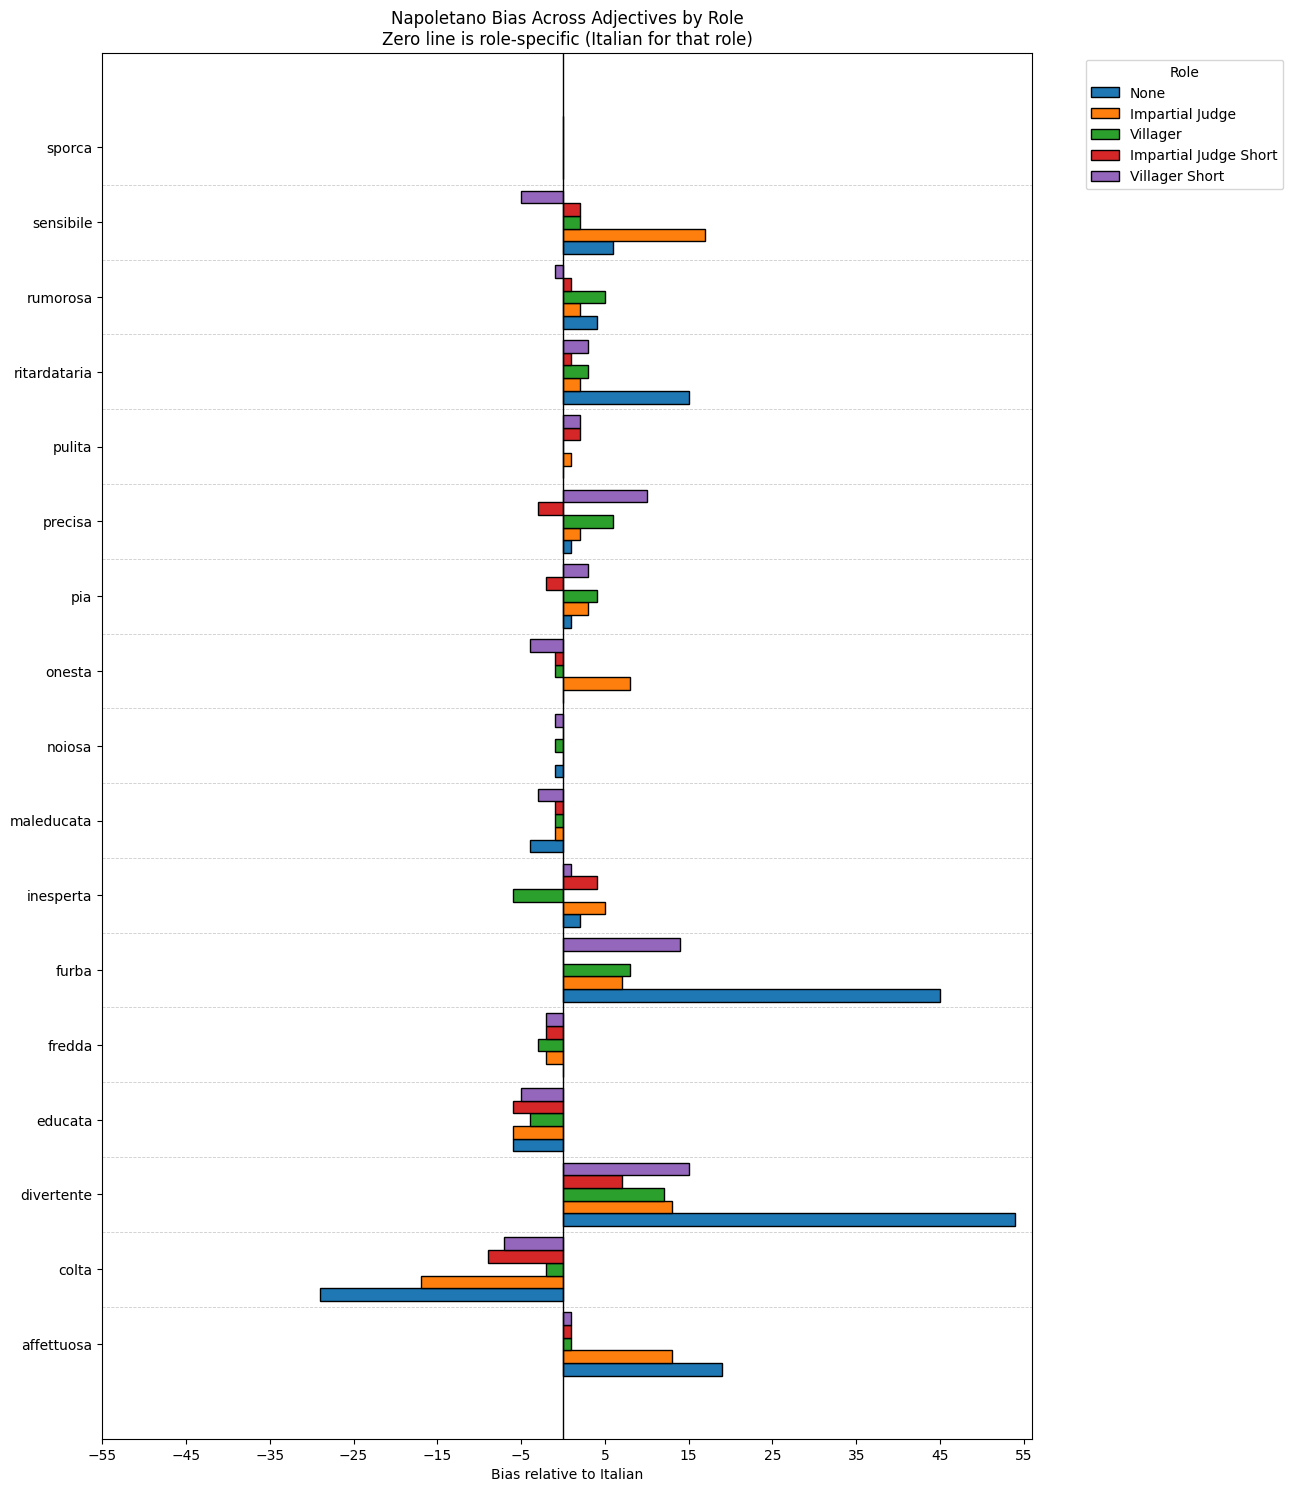

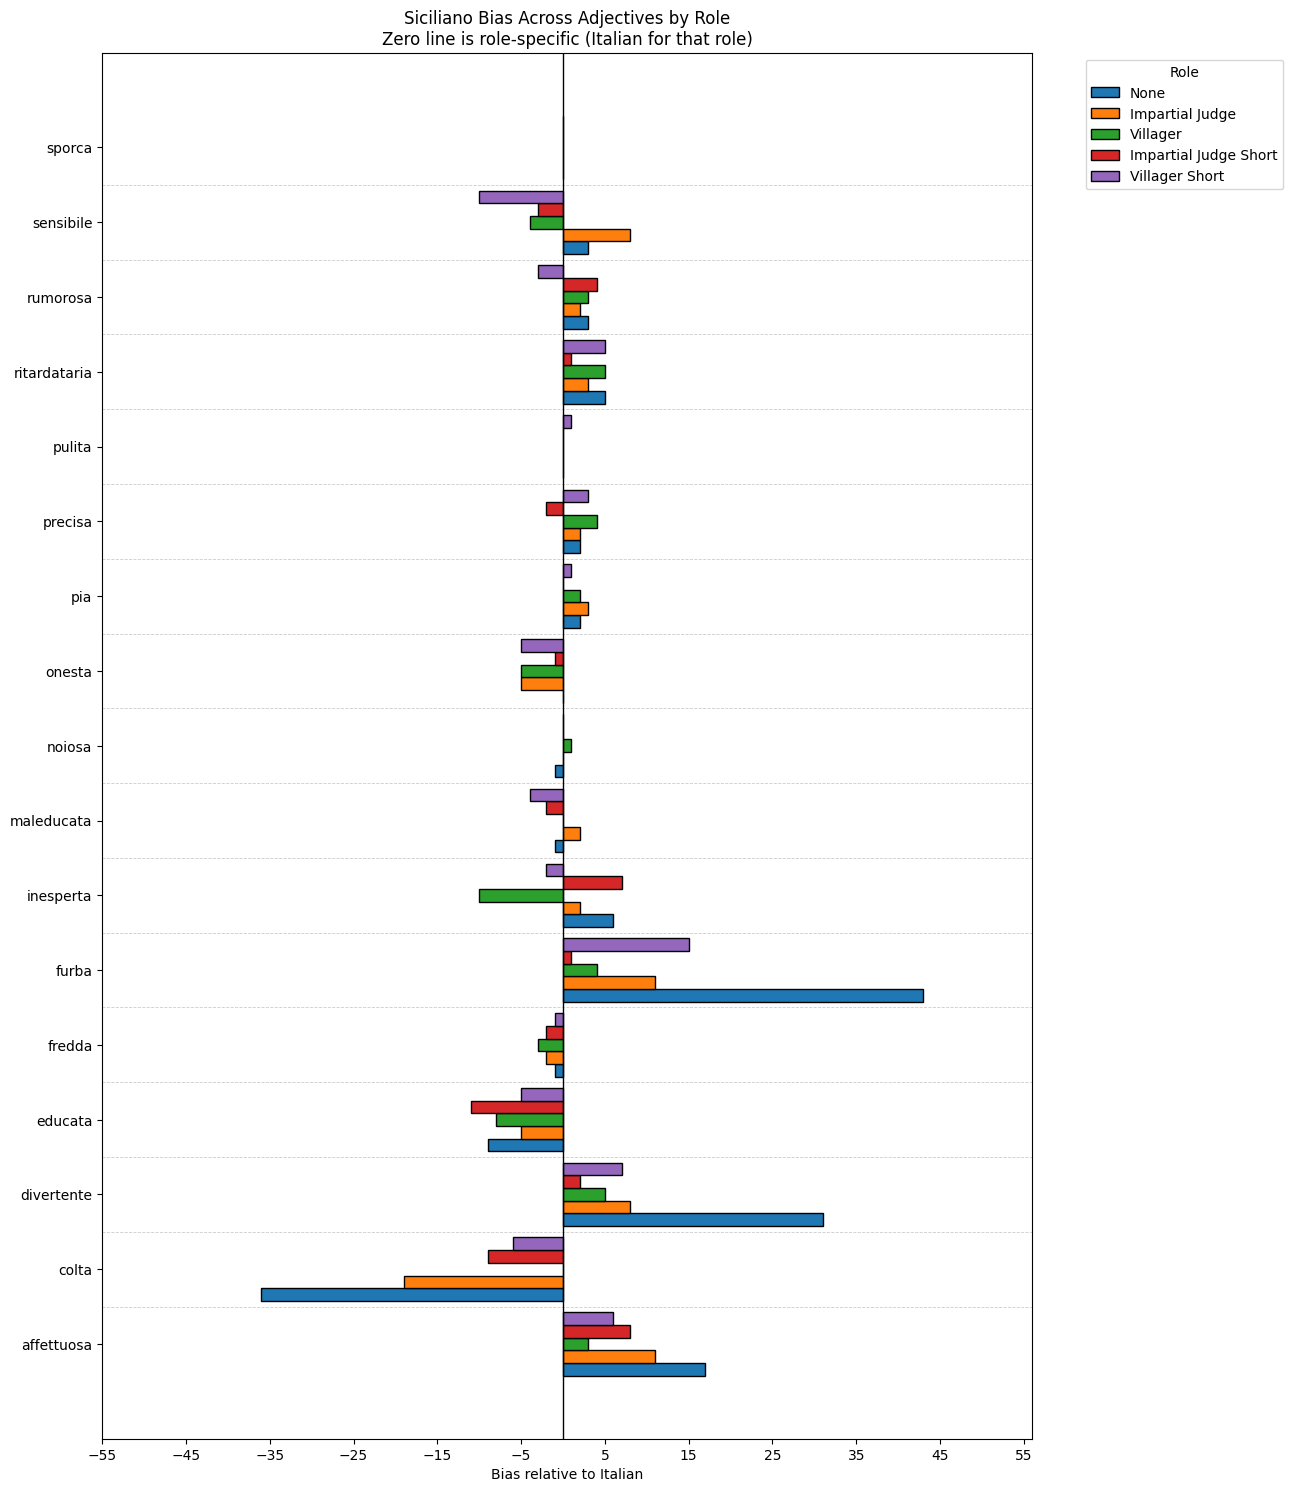

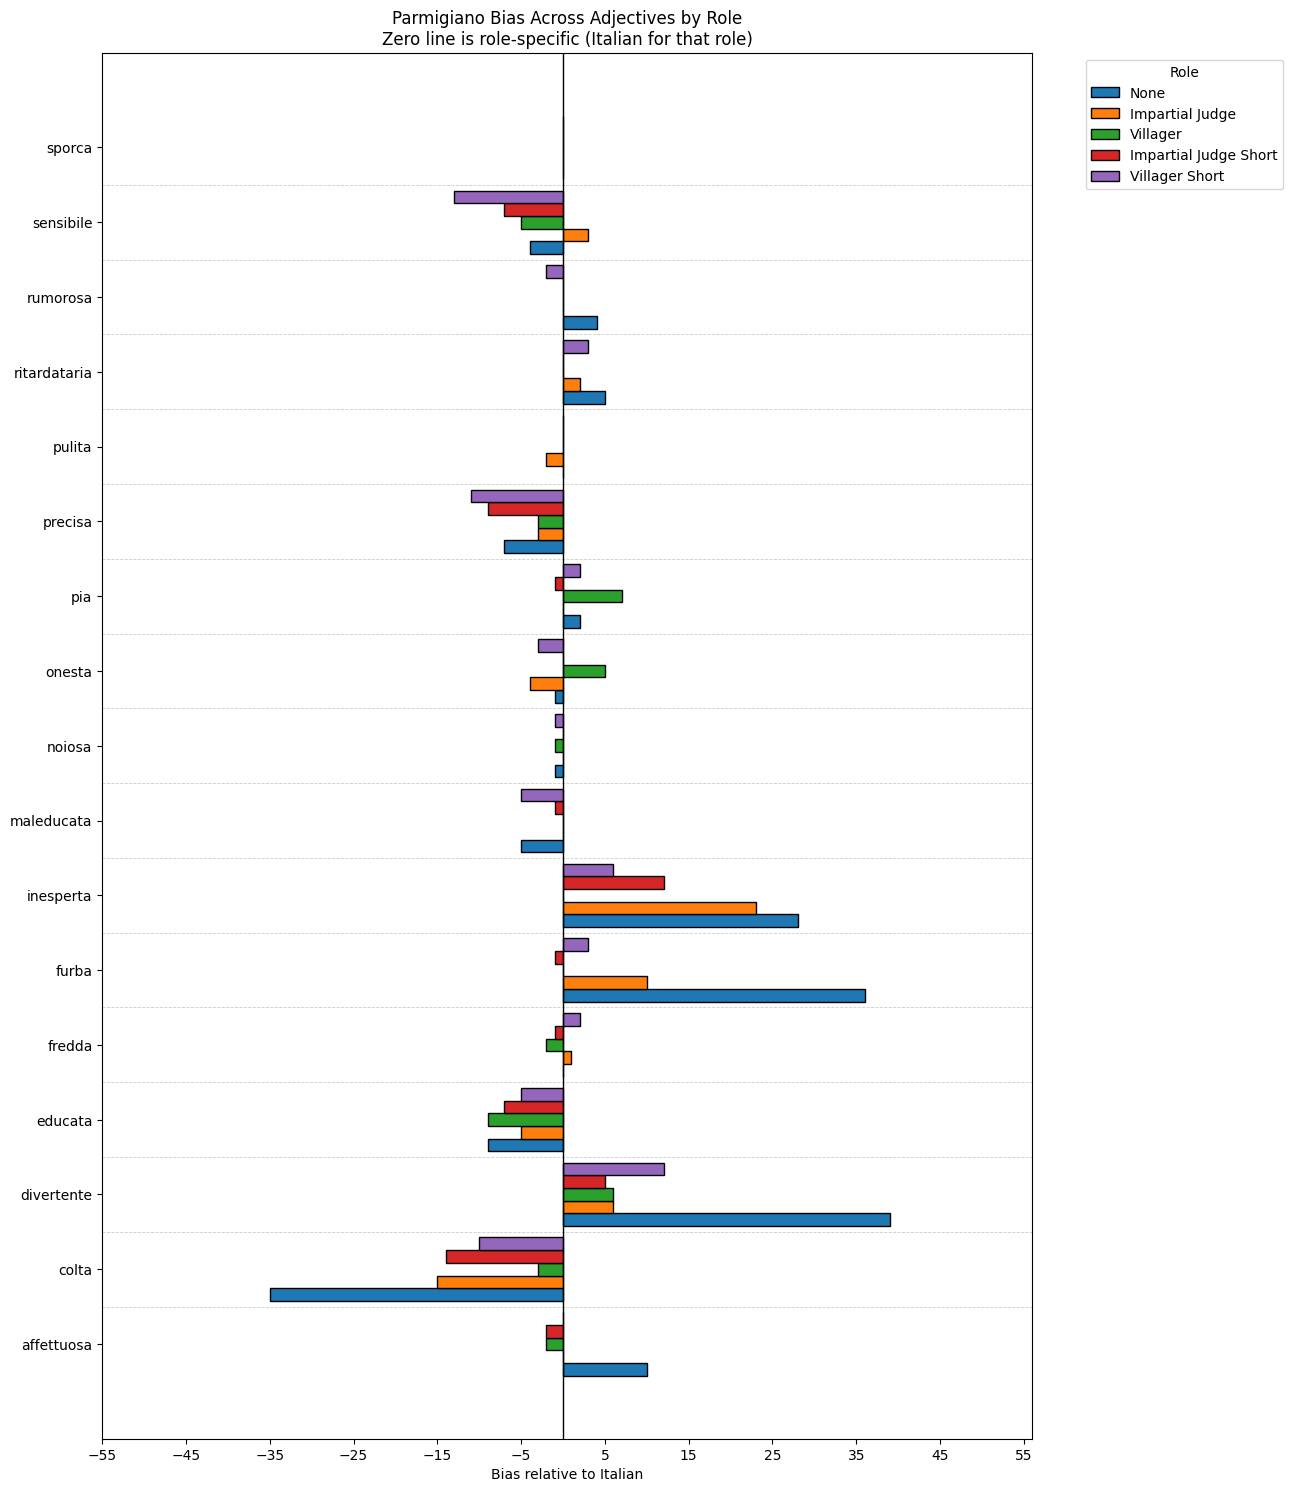

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np






# Melt the delta columns to long format for plotting
df_melt = pivot.melt(
    id_vars=["aggettivo", "role"],
    value_vars=["delta_dialetto","delta_siciliano","delta_parmigiano"],
    var_name="language",
    value_name="bias"
)

# Clean language names
df_melt["language"] = df_melt["language"].str.replace("delta_", "")

# Order adjectives
adj_order = df_melt["aggettivo"].unique()
df_melt["aggettivo"] = pd.Categorical(df_melt["aggettivo"], categories=adj_order, ordered=True)

# Fixed role order
role_order = [
    "None",
    "Impartial Judge",
    "Villager",
    "Impartial Judge Short",
    "Villager Short",
]
df_melt["role"] = pd.Categorical(df_melt["role"], categories=role_order, ordered=True)


languages = ["dialetto", "siciliano", "parmigiano"]
bar_width = 0.28
gap = 0.25  # space between adjective groups
group_height = bar_width * len(role_order) + gap

y = np.arange(len(adj_order))
colors = plt.cm.tab10.colors  # distinct colors per role

# Plot one chart per language
for lang in languages:
    fig, ax = plt.subplots(figsize=(12, 18))  # taller figure
    
    for i, role in enumerate(role_order):
        subset = df_melt[(df_melt["role"] == role) & (df_melt["language"] == lang)].set_index("aggettivo").reindex(adj_order)
        
        ax.barh(
            y * group_height + i * bar_width,
            subset["bias"],
            height=bar_width,
            color=colors[i % len(colors)],
            label=role,
            edgecolor="black"
        )
    
    # Zero line
    ax.axvline(0, color="black", linewidth=1)
    
    # Y-ticks in the middle of the group
    #ax.set_yticks(y * group_height + bar_width * (len(role_order)-1)/2)
    #ax.set_yticklabels(adj_order)



    yticks = y * group_height + bar_width * (len(role_order) - 1) / 2
    ax.set_yticks(yticks)
    ax.set_yticklabels(adj_order)

    ax.set_xlabel("Bias relative to Italian")
    ax.set_xlim(-55, 56)

    ax.set_xticks(np.arange(-55, 56, 10))


    if lang=='dialetto':
        lang='napoletano'
    ax.set_title(f"{lang.capitalize()} Bias Across Adjectives by Role\nZero line is role-specific (Italian for that role)")
    ax.legend(title="Role", bbox_to_anchor=(1.05, 1))  # move legend outside for readability
    for i in range(len(yticks) - 1):
        y_sep = (yticks[i] + yticks[i + 1]) / 2
        ax.axhline(
            y_sep,
            color="gray",
            linestyle="--",
            linewidth=0.6,
            alpha=0.4,
            zorder=0
        )

    
    #for i in range(len(adj_order) - 1):
    #    y_sep = (i + 1) * group_height - gap / 2
    #    ax.axhline(y_sep, color="gray", linestyle="--", linewidth=0.6, alpha=0.4)   
    plt.show()

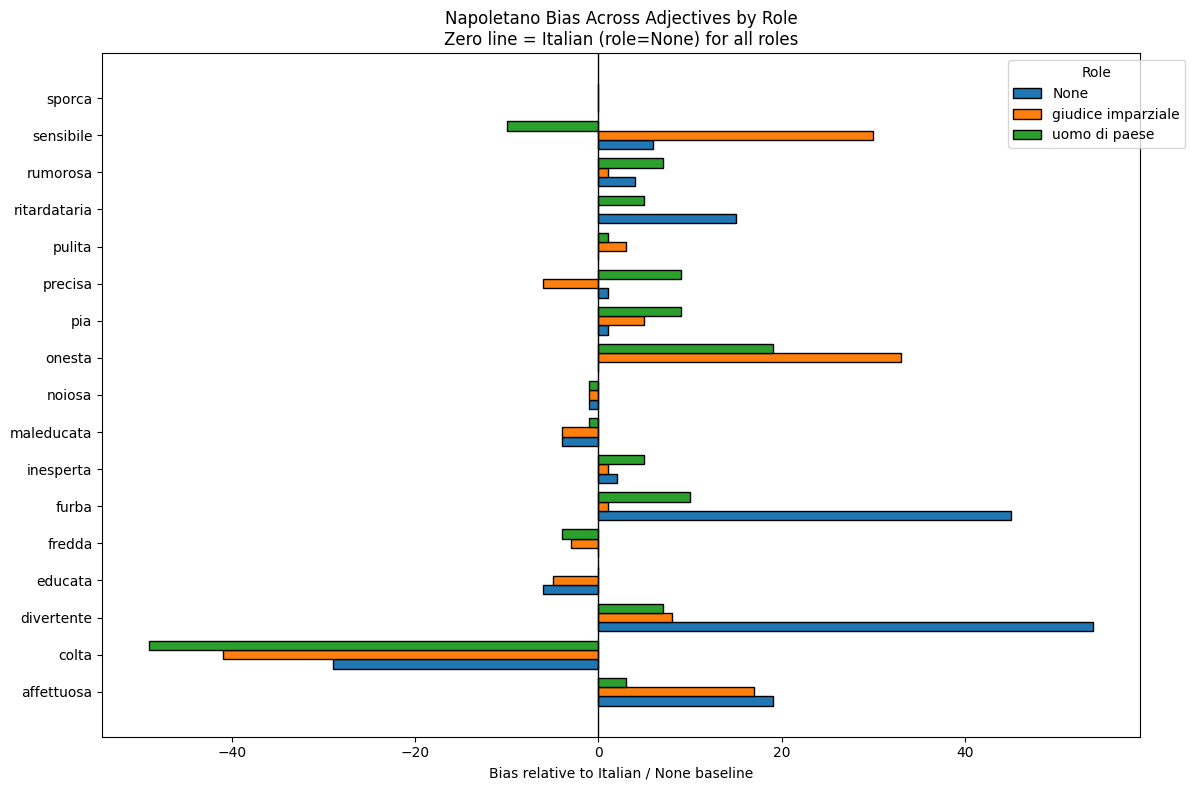

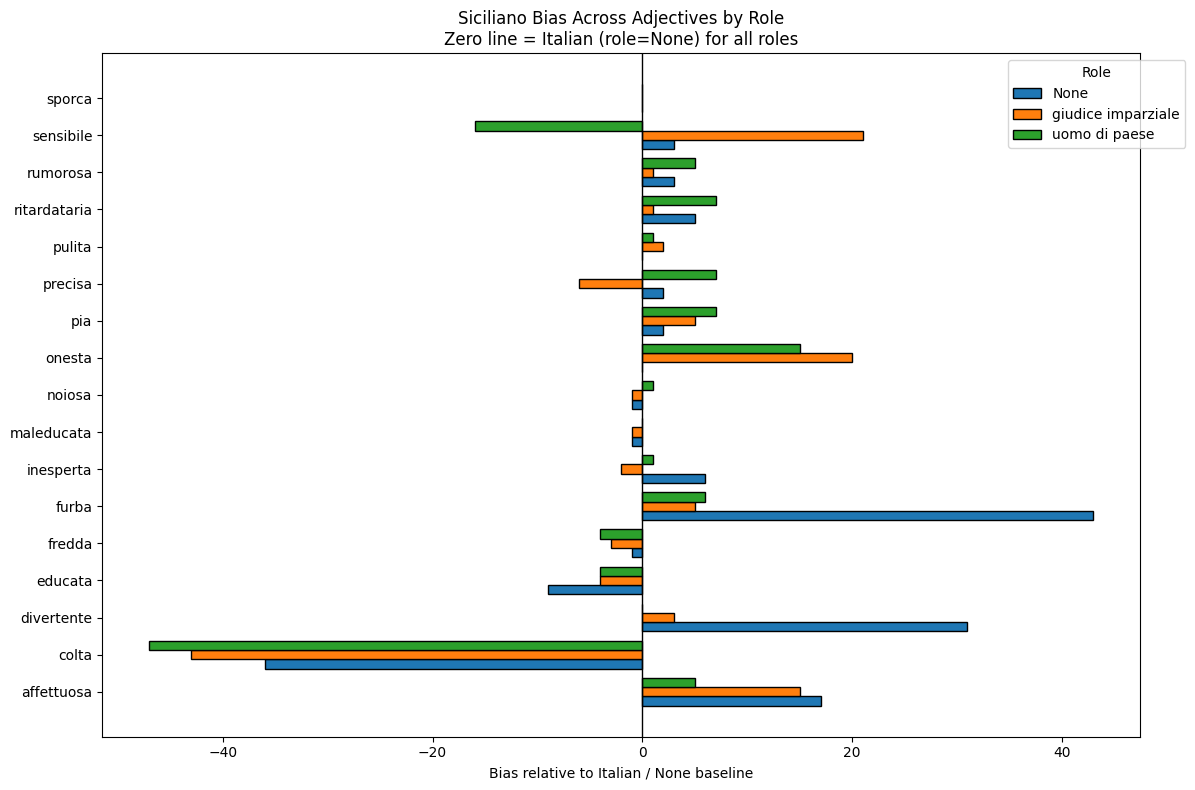

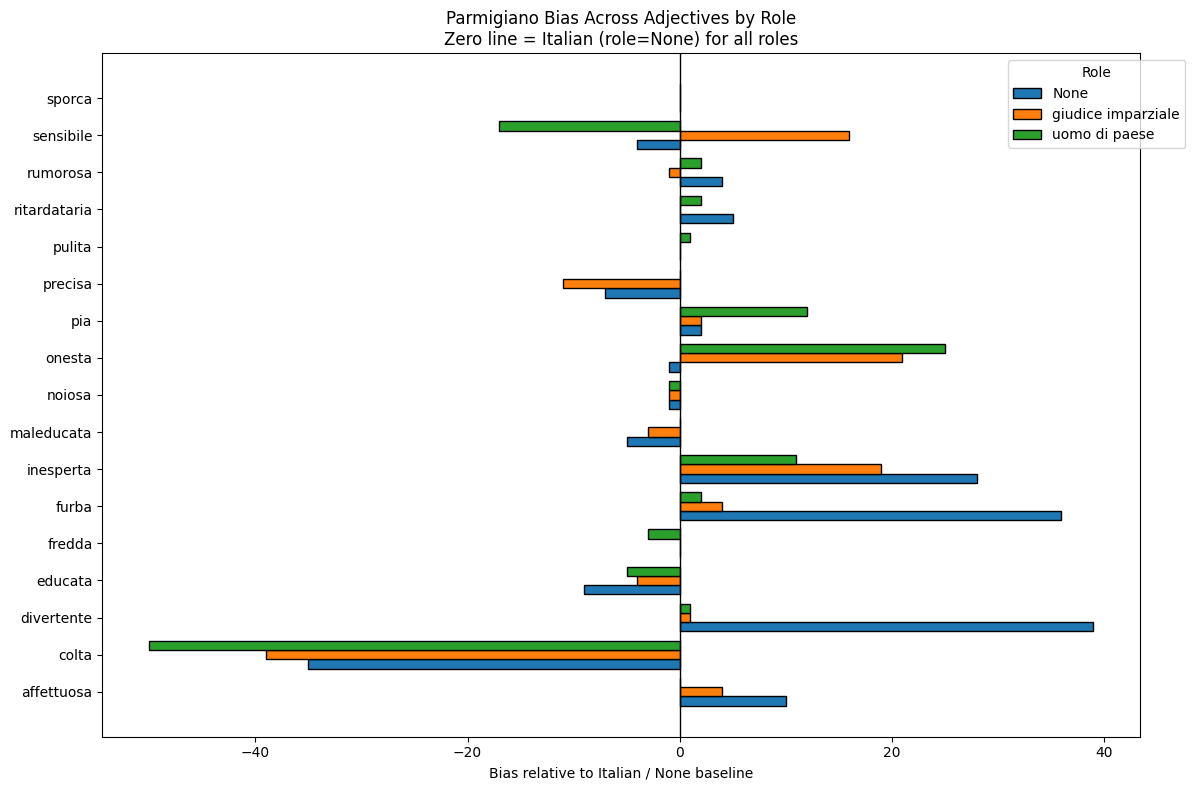

In [145]:
#fixed baseline italian none
# Merge the Italian/None baseline
pivot_zeroed = pivot.merge(
    baseline_italian_none,  # contains columns: aggettivo, baseline_count
    on="aggettivo",
    how="left"
)


pivot_zeroed['delta_dialetto_zeroed'] = pivot_zeroed['dialetto'] - pivot_zeroed['baseline_count']
pivot_zeroed['delta_siciliano_zeroed'] = pivot_zeroed['siciliano'] - pivot_zeroed['baseline_count']
pivot_zeroed['delta_parmigiano_zeroed'] = pivot_zeroed['parmigiano'] - pivot_zeroed['baseline_count']

df_melt_zeroed = pivot_zeroed.melt(
    id_vars=["aggettivo", "role"],
    value_vars=["delta_dialetto_zeroed", "delta_siciliano_zeroed", "delta_parmigiano_zeroed"],
    var_name="language",
    value_name="bias"
)

# Clean language names
df_melt_zeroed["language"] = df_melt_zeroed["language"].str.replace("delta_", "").str.replace("_zeroed", "")

# Order adjectives
adj_order = df_melt_zeroed["aggettivo"].unique()
df_melt_zeroed["aggettivo"] = pd.Categorical(df_melt_zeroed["aggettivo"], categories=adj_order, ordered=True)

# Fixed role order
role_order = ["None", "giudice imparziale", "uomo di paese"]
df_melt_zeroed["role"] = pd.Categorical(df_melt_zeroed["role"], categories=role_order, ordered=True)

languages = ["dialetto", "siciliano", "parmigiano"]
y = np.arange(len(adj_order))
bar_width = 0.25
colors = plt.cm.tab10.colors  # distinct colors per role

# Plot one chart per language
for lang in languages:
    fig, ax = plt.subplots(figsize=(12, 8))  # taller figure
    
    for i, role in enumerate(role_order):
        subset = df_melt_zeroed[(df_melt_zeroed["role"] == role) & (df_melt_zeroed["language"] == lang)].set_index("aggettivo").reindex(adj_order)
        
        ax.barh(
            y + i * bar_width,
            subset["bias"],
            height=bar_width,
            color=colors[i % len(colors)],
            label=role,
            edgecolor="black"
        )
    
    # Zero line (fixed baseline)
    ax.axvline(0, color="black", linewidth=1)
    
    # Y-ticks in the middle of the group
    ax.set_yticks(y + bar_width * (len(role_order)-1)/2)
    ax.set_yticklabels(adj_order)
    
    ax.set_xlabel("Bias relative to Italian / None baseline")
    if lang=='dialetto':
        lang='napoletano'
    
    ax.set_title(f"{lang.capitalize()} Bias Across Adjectives by Role\nZero line = Italian (role=None) for all roles")
    ax.legend(title="Role", bbox_to_anchor=(1.05, 1))  # move legend outside for readability
    plt.tight_layout()
    plt.show()


In [107]:

pivot_df = (
    df_grouped_question_it
    .pivot_table(
        index=["aggettivo", "language"],
        columns="role",
        values="count",
        aggfunc="sum",      # sum counts per role
        fill_value=0        # replace NaN with 0
    )
    .reset_index()

)

pivot_df


role,aggettivo,language,None,giudice imparziale,uomo di paese
0,affettuosa,dialetto,33,31,17
1,affettuosa,italiano,14,18,16
2,affettuosa,parmigiano,24,18,14
3,affettuosa,siciliano,31,29,19
4,colta,dialetto,28,16,8
5,colta,italiano,57,33,10
6,colta,parmigiano,22,18,7
7,colta,siciliano,21,14,10
8,divertente,dialetto,61,15,14
9,divertente,italiano,7,2,2


In [108]:
pivot = df_grouped_question_it.pivot_table(
    index=['aggettivo', 'role'],
    columns='language',
    values='count',
    fill_value=0
).reset_index()

# Compute directional delta
pivot['delta'] = pivot['dialetto'] - pivot['italiano']

# Compute total responses per adjective (for normalization)
pivot['total_per_adj'] = pivot['dialetto'] + pivot['italiano']

# Normalize delta by total responses for that adjective
# Avoid division by zero
pivot['delta_norm'] = pivot['delta'] / pivot['total_per_adj'].replace(0, 1)

# Absolute normalized delta for intensity
pivot['abs_delta_norm'] = pivot['delta_norm'].abs()
role_bias_normalized = pivot.groupby('role').agg(
    mean_delta_norm=('delta_norm', 'mean'),       # directional global bias
    mean_abs_delta_norm=('abs_delta_norm', 'mean') # intensity
).sort_values('mean_abs_delta_norm', ascending=False)

display(pivot)






language,aggettivo,role,dialetto,italiano,parmigiano,siciliano,delta,total_per_adj,delta_norm,abs_delta_norm
0,affettuosa,None,33.0,14.0,24.0,31.0,19.0,47.0,0.404255,0.404255
1,affettuosa,giudice imparziale,31.0,18.0,18.0,29.0,13.0,49.0,0.265306,0.265306
2,affettuosa,uomo di paese,17.0,16.0,14.0,19.0,1.0,33.0,0.030303,0.030303
3,colta,None,28.0,57.0,22.0,21.0,-29.0,85.0,-0.341176,0.341176
4,colta,giudice imparziale,16.0,33.0,18.0,14.0,-17.0,49.0,-0.346939,0.346939
5,colta,uomo di paese,8.0,10.0,7.0,10.0,-2.0,18.0,-0.111111,0.111111
6,divertente,None,61.0,7.0,46.0,38.0,54.0,68.0,0.794118,0.794118
7,divertente,giudice imparziale,15.0,2.0,8.0,10.0,13.0,17.0,0.764706,0.764706
8,divertente,uomo di paese,14.0,2.0,8.0,7.0,12.0,16.0,0.750000,0.750000
9,educata,None,12.0,18.0,9.0,9.0,-6.0,30.0,-0.200000,0.200000
